# Lab 2 - Working with Structured Data

The target of this lab session is to analyze and understand a large
dataset efficiently. The dataset we will work with is a dataset of
cities in the US and their climates. The module will
discuss the challenges of loading data, finding the parts we are
interested in, and visualizing data output.

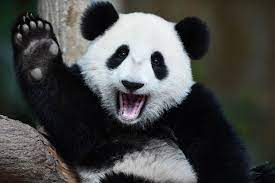

The main technical tool we will be working with is a library known
as `Pandas`. Despite the silly name, Pandas is a super popular
library for data analysis. It is used in many technology companies
for loading and manipulating data. 

# Review

Before we get started let us review some of the Python code that we saw last class. 

![python](https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg)

We first saw a bunch of different types such as numbers, strings, and lists

In [1]:
number1 = 50.5
string1 = "New York"
list1 = ["Queens", "Brooklyn", "Manhattan", "Staten Island", "The Bronx"]

We then saw some more complex types likes dates and counters.

In [2]:
import datetime
date1 = datetime.datetime.now()
date1

datetime.datetime(2021, 6, 10, 13, 46, 21, 820791)

As there are so many different types in Python, we discussed how
important it was to use Google and StackOverflow to find examples.

In [3]:
from collections import Counter
counter = Counter(["A", "B", "A", "A", "C", "C", "B", "A", "A", "A"])
counter.most_common()

[('A', 6), ('B', 2), ('C', 2)]

Next, we focused on `if` and `for` the two most important control
elements in python.

* `if` lets us decide which block of code to run
* `for` lets us run the same code for each element in a list

In [4]:
for val in range(10):
    print(val)

0
1
2
3
4
5
6
7
8
9


Finally we discussed the special case of strings. There are
many useful ways to find values in strings and create new strings.

In [5]:
"first " + "second"

'first second'

In [6]:
str1 = "first|second"

In [7]:
str1.split("|")

['first', 'second']

## Review Exercise 

Print only the values in this list that are greater than 20.

In [8]:
list1 = [5, 50, 15, 60, 4, 80]

In [9]:
#📝📝📝📝 FILLME
pass

# Unit A

This week is all about `data tables`. Data tables are a common way
of representing facts anywhere from newspaper articles to scientific
studies.

For instance, as a running example let us consider this table from Wikipedia.

![new york](https://upload.wikimedia.org/wikipedia/commons/thumb/5/57/LA_Skyline_Mountains2.jpg/120px-LA_Skyline_Mountains2.jpg)

https://en.wikipedia.org/wiki/List_of_North_American_cities_by_population

You may have used datatables before in spreadsheets. For example we can put that
wikipedia table in a spreadsheet.

https://docs.google.com/spreadsheets/d/1Jwcr6IBJbOT1G4Vq7VqaZ7S1V9gRmUb5ALkJPaG5fxI/edit?usp=sharing

In this spreadsheet we can do lots of things.

👩‍🎓**Student question: Do you know how to do the following?**

* Change the column names
* Delete a row
* Make a graph
* Add a new column

What about more advanced ideas. Can you?

* Sort by a column?
* Add a new column that changes the previous column?
* Take the sum of a row?
* Find the highest value in a row?

In this lab we will work with real-world data to learn how to
calculate important properties.

## Pandas

The data that we are working with is located in the file "Cities.csv".
You can get this file from the internet by running this command.

This file is raw data as a text file. We can see the output in raw form.

https://srush.github.io/BT-AI/notebooks/Cities.csv

We can see that "csv" stands for "comma separated values" as each element
of the file is split using a comma. 

Pandas is as a super-powered spreadsheet.

In [10]:
import pandas as pd

To load data in the library we use the following command. Here `df`
refers to the "DataFrame" which is what Pandas calls a spreadsheet.

In [11]:
df = pd.read_csv("https://srush.github.io/BT-AI/notebooks/Cities.csv")
df

,Rank,City,Country,Population
0,0,Mexico City,Mexico,8918653
1,1,New York City,United States,8550405
2,2,Los Angeles,United States,3971883
3,3,Toronto,Canada,2826498
4,4,Chicago,United States,2720546
...,...,...,...,...
90,90,Surrey,Canada,526004
91,91,Ciudad López Mateos,Mexico,523296
92,92,Tultitlán,Mexico,520557
93,93,Fresno,United States,520052


Just like in a spreadsheet Pandas has multiple columns representing
the underlying elements in the data. These each have a name here.

In [12]:
df.columns

Index(['Rank', 'City', 'Country', 'Population'], dtype='object')

To see just the elements in a single column we can use square
brackets to see just only column.

In [13]:
df["City"]

0             Mexico City
1           New York City
2             Los Angeles
3                 Toronto
4                 Chicago
             ...         
90                 Surrey
91    Ciudad López Mateos
92              Tultitlán
93                 Fresno
94              Carrefour
Name: City, Length: 95, dtype: object

👩‍🎓**Student Question: Can you print out another column in the table?**

In [14]:
#📝📝📝📝 FILLME
pass

Alternatively if we want to see just a single row we can use the `loc`
command. 

In [15]:
df.loc[1]

Rank                      1
City          New York City
Country       United States
Population          8550405
Name: 1, dtype: object

If we want to select several rows we can also pass in a list.

In [16]:
list_of_rows = [1, 5, 6]
df.loc[list_of_rows]

,Rank,City,Country,Population
1,1,New York City,United States,8550405
5,5,Houston,United States,2296224
6,6,Havana,Cuba,2117625


👩‍🎓**Student Question: Can you print out the rows of Philadelphia and Los Angeles?**

In [17]:
#📝📝📝📝 FILLME
pass

## Filters

These commands are relatively basic though and easy to do in a
standard spreadsheet. The main power of Pandas comes from the
ability to select rows based on complex filters.

For instance, if you were in a spreadsheet, how would you select only the
rows that correspond to cities in *Mexico*? It's possible but a bit challenging. 

In Pandas, we first create a filter. This is kind of like an if statement that gets
applied to every row. It creates a variable that remembers which rows passed the filter test.

**Filtering**

1. Decide on the conditional statements in your filter.
2. Define a `filter` varaible for your dataframe 
3. Apply filter and rename the dataframe.

Step 1. Our filter is that we want the Country column to be Mexico

Step 2. We create a filter variable with this conditional. Notice
that the filter has a 1 for every city in Mexico and a 0 otherwise.

In [18]:
filter = df["Country"] == "Mexico"
filter

0      True
1     False
2     False
3     False
4     False
      ...  
90    False
91     True
92     True
93    False
94    False
Name: Country, Length: 95, dtype: bool

Step 3. We then apply the filter to select the rows that we would like to
keep around.

In [19]:
cities_in_mexico_df = df.loc[filter]
cities_in_mexico_df

,Rank,City,Country,Population
0,0,Mexico City,Mexico,8918653
8,8,Ecatepec de Morelos,Mexico,1677678
12,12,Guadalajara,Mexico,1460148
13,13,Puebla,Mexico,1437939
15,15,Juárez,Mexico,1382753
16,16,León,Mexico,1349224
18,18,Tijuana,Mexico,1298475
21,21,Zapopan,Mexico,1179681
22,22,Monterrey,Mexico,1109171
24,24,Nezahualcóyotl,Mexico,1039867


We need to be careful to give this a new name. It does not change the original
dataframe it just shows us the rows we asked for. 

Filtering is a really important step because it lets us calculate other properties.

For example, we can then count the number of cities in Mexico.

In [20]:
total_cities_in_mexico = cities_in_mexico_df["City"].count()
total_cities_in_mexico

38

Or we can count the population of the biggest cities in Mexico.

In [21]:
total_population_in_mexico = cities_in_mexico_df["Population"].sum()
total_population_in_mexico

40623960

Filters can also be more complex. You can check for any of the  different properties
you might check for in a standard if statement.

For instance, here we want to keep both cities in the US and in Canada. The
symbol `|` means `either-or`. 

In [22]:
filter = (df["Country"] == "United States") | (df["Country"] == "Canada")
us_or_canada_df = df.loc[filter]
us_or_canada_df

,Rank,City,Country,Population
1,1,New York City,United States,8550405
2,2,Los Angeles,United States,3971883
3,3,Toronto,Canada,2826498
4,4,Chicago,United States,2720546
5,5,Houston,United States,2296224
7,7,Montreal,Canada,1753034
9,9,Philadelphia,United States,1567442
10,10,Phoenix,United States,1563025
11,11,San Antonio,United States,1469845
14,14,San Diego,United States,1394928


👩‍🎓**Student Question: How many of the cities are in the US or Canada?**

In [23]:
#📝📝📝📝 FILLME
pass

Here is a list of the different statements that we commonly use.

| Filter | Symbol |
|--------|--------|
| Or     | \|     |
| And    | &      |
| Not    | ~      |
| Equal  | ==     |
| Less   | <      |
| Greater| >      |
| Greater| >      |
| In     | .str.contains      |
| Is one of     | .isin      |

Note: I didn't know many of these by heart.
Don't be afraid to google "how to filter by ... in pandas" if you get stuck.

# Group Exercise A

## Question 1 

Filters can be of many different types. For instance, when working
with numerical fields we can have filters based on greater-than and
less-than comparisons.

Write a filter that keeps only cities with greater than a
million people.

In [24]:
#📝📝📝📝 FILLME
pass

How many are there?

In [25]:
#📝📝📝📝 FILLME
pass

(Be sure to print it out to check that it worked!)

## Question 2

Several cities in North America include the word "City" in their name. 
Write a filter to find the cities that have "City" in their name. 

In [26]:
#📝📝📝📝 FILLME
pass

What is the smallest city on this list?

In [27]:
#📝📝📝📝 FILLME
pass

## Question 3

Most of the cities on the list are in Canada, Mexico or the US.

Can you write a filter to find the cities that are not in any of these countries?

In [28]:
#📝📝📝📝 FILLME
pass

What is the largest city in this list?

In [29]:
#📝📝📝📝 FILLME
pass

## Question 4

We can also apply filters that look for two properties at the same time. 

Can you write a filter to find the cities in the US over a million people?

In [30]:
#📝📝📝📝 FILLME
pass

How many are there?

In [31]:
#📝📝📝📝 FILLME
pass

# Unit B

In this unit we will look at three more advanced Pandas functions.
Unlike filters, which just remove rows, these will allow use to manipute
our data to compute new properties and even new columns. 

## Group By's

We saw above how to compute the total number of cities in Mexico on
our list. We did this by first filtering and then "aggregating" by
calling `count()`. Here is a reminder. 

In [32]:
filter = df["Country"] == "Mexico"
cities_in_mexico_df = df.loc[filter]
total_cities_in_mexico = cities_in_mexico_df["City"].count()
total_cities_in_mexico

38

However, what if we also want to know the number of cities
in Canada and US and all the other countries on our list.
We can do this with a group-by operation

**GroupBy**

1. GroupBy - Determine the subset of data to use
2. Aggregation - Compute a property over the group

Step 1. Group By

In [33]:
grouped = df.groupby(["Country"])

Step 2. Aggregate

In [34]:
count_of_cities = grouped["City"].count()
count_of_cities

Country
Canada                12
Cuba                   1
Dominican Republic     2
Guatemala              2
Haiti                  2
Honduras               2
Jamaica                1
Mexico                38
Nicaragua              1
United States         34
Name: City, dtype: int64

Here is another example. This one computes the population of the
largest city in each country. 

In [35]:
max_pop = grouped["Population"].max()
max_pop

Country
Canada                2826498
Cuba                  2117625
Dominican Republic    1007997
Guatemala              994078
Haiti                  987310
Honduras              1190230
Jamaica                669627
Mexico                8918653
Nicaragua             1048134
United States         8550405
Name: Population, dtype: int64

👩‍🎓**Student Question: Can you compute the city with the minimum population on the list for each country? **

In [36]:
#📝📝📝📝 FILLME
pass

## Manipulating Tables

Another useful aspect of tables is is to add in new columns.
Adding new columns allows us to group by additional properties,
create advanced filters, or make pretty graphs.

The easiest way to add a new column in pandas is to write a function
that tells us how to create the new column from the other columns in
the table.

In order to add a new column, we need to write a function.
If you remember last class, a function looked something like this.

In [37]:
# Returns if the country is in US or Canada
def in_us_or_canada(country):
    if country == "United States":
        return "US/Canada"
    if country == "Canada":
        return "US/Canada"
    return "Not US/Canada"

Now we can add a new column by setting that column equal to
the country. We do this by calling Pandas `map` with the function
and the column of interest. This line of code will call our function
for each row of the Country column. Notice how it creates a new column.

In [38]:
df["US_or_Canada"] = df["Country"].map(in_us_or_canada)
df

,Rank,City,Country,Population,US_or_Canada
0,0,Mexico City,Mexico,8918653,Not US/Canada
1,1,New York City,United States,8550405,US/Canada
2,2,Los Angeles,United States,3971883,US/Canada
3,3,Toronto,Canada,2826498,US/Canada
4,4,Chicago,United States,2720546,US/Canada
...,...,...,...,...,...
90,90,Surrey,Canada,526004,US/Canada
91,91,Ciudad López Mateos,Mexico,523296,Not US/Canada
92,92,Tultitlán,Mexico,520557,Not US/Canada
93,93,Fresno,United States,520052,US/Canada


In [39]:
df.columns

Index(['Rank', 'City', 'Country', 'Population', 'US_or_Canada'], dtype='object')

We can then use this column in a group by.

In [40]:
grouped = df.groupby(["US_or_Canada"])
count_of_cities = grouped["City"].count()
count_of_cities

US_or_Canada
Not US/Canada    49
US/Canada        46
Name: City, dtype: int64

A similar technique can be used to manipulate the data in a
column to change certain values. For instance, we might want to
remove the final " City" from cities like "New York" 

In [41]:
def change_name(str1):
    return str1.replace(" City", "")

In [42]:
df["City"] = df["City"].map(change_name)
df

,Rank,City,Country,Population,US_or_Canada
0,0,Mexico,Mexico,8918653,Not US/Canada
1,1,New York,United States,8550405,US/Canada
2,2,Los Angeles,United States,3971883,US/Canada
3,3,Toronto,Canada,2826498,US/Canada
4,4,Chicago,United States,2720546,US/Canada
...,...,...,...,...,...
90,90,Surrey,Canada,526004,US/Canada
91,91,Ciudad López Mateos,Mexico,523296,Not US/Canada
92,92,Tultitlán,Mexico,520557,Not US/Canada
93,93,Fresno,United States,520052,US/Canada


## Joining Together Tables

Pandas becomes much more powerful when we start to have many
different tables that relate to each other. For this example we will
consider another table that provides the locations about these
cities. You can see that here: 

[City Location Spreadsheet](https://docs.google.com/spreadsheets/d/1Jwcr6IBJbOT1G4Vq7VqaZ7S1V9gRmUb5ALkJPaG5fxI/edit?usp=sharing)

Lets load this table into a new variable.

In [43]:
all_cities_df = pd.read_csv("https://srush.github.io/BT-AI/notebooks/AllCities.csv")
all_cities_df

,Id,City,Country,Longitude,Latitude
0,0,A Coruña,Spain,8.73W,42.59N
1,1,Aachen,Germany,6.34E,50.63N
2,2,Aalborg,Denmark,10.33E,57.05N
3,3,Aba,Nigeria,8.07E,5.63N
4,4,Abadan,Iran,48.00E,29.74N
...,...,...,...,...,...
3505,3505,Århus,Denmark,10.33E,57.05N
3506,3506,Çorlu,Turkey,27.69E,40.99N
3507,3507,Çorum,Turkey,34.08E,40.99N
3508,3508,Öskemen,Kazakhstan,82.39E,50.63N


This table has most of the cities in our dataset.
But there are also a lot of other cities in this table outside of North America. 

In [44]:
filter = all_cities_df["Country"] == "Germany" 
europe_df = all_cities_df.loc[filter]
europe_df

,Id,City,Country,Longitude,Latitude
1,1,Aachen,Germany,6.34E,50.63N
187,187,Augsburg,Germany,10.66E,47.42N
338,338,Bergisch Gladbach,Germany,6.34E,50.63N
340,340,Berlin,Germany,13.14E,52.24N
370,370,Bielefeld,Germany,7.88E,52.24N
...,...,...,...,...,...
3343,3343,Wiesbaden,Germany,8.87E,50.63N
3349,3349,Witten,Germany,7.88E,52.24N
3351,3351,Wolfsburg,Germany,10.51E,52.24N
3364,3364,Wuppertal,Germany,6.34E,50.63N


In order to use this new information let's merge since it in to our table. 
We just need to tell pandas which are the shared columns
between the two tables. 

In [45]:
df = df.merge(all_cities_df, on=["City", "Country"])
df

,Rank,City,Country,Population,US_or_Canada,Id,Longitude,Latitude
0,0,Mexico,Mexico,8918653,Not US/Canada,1955,98.96W,20.09N
1,1,New York,United States,8550405,US/Canada,2126,74.56W,40.99N
2,2,Los Angeles,United States,3971883,US/Canada,1775,118.70W,34.56N
3,3,Toronto,Canada,2826498,US/Canada,3140,80.50W,44.20N
4,4,Chicago,United States,2720546,US/Canada,608,87.27W,42.59N
...,...,...,...,...,...,...,...,...
79,87,Tonalá,Mexico,536111,Not US/Canada,3132,104.08W,20.09N
80,88,Tucson,United States,531641,US/Canada,3171,111.20W,31.35N
81,89,Cuautitlán Izcalli,Mexico,531041,Not US/Canada,719,98.96W,20.09N
82,93,Fresno,United States,520052,US/Canada,960,119.34W,36.17N


# Group Exercise B

## Question 1

The following are the official abbreviation codes for the cities in our data table.

In [46]:
abbrev = {
    "United States": "US",
    "Mexico" : "MX",
    "Canada" : "CA",
    "Haiti" : "HAT",
    "Jamaica" : "JM",
    "Cuba" : "CU",
    "Honduras" : "HO",
    "Nicaragua" : "NR",
    "Dominican Republic" : "DR",
    "Guatemala" : "G",
    }

Can you add a new column to the table called "Abbrev" that lists the abbreviation code for that city?

In [47]:
#📝📝📝📝 FILLME
pass

## Question 2

Our table has the Latitude and Longitude of all the major North American Cities. 

Can you find out where New York is located? How about Detroit, Las Vegas, and Portland?

## Question 3

Currently in the table the latitude and longitude are represented as string types, because they
have N / S and E / W in their values. These two functions will fix that issue. 

In [48]:
def latitude_to_number(latitude_string):
    str1 = latitude_string
    if str1[-1] == "N":
        return float(str1[:-1])        
    else:
        return -float(str1[:-1])    

In [49]:
def longitude_to_number(longitude_string):
    str1 = longitude_string.replace("W", "")
    return -float(str1)

In [50]:
lat = latitude_to_number("190N")
lat

190.0

Can you use these functions to fix the Latitude and Longitude columns to instead use numeric values?

In [51]:
#📝📝📝📝 FILLME
pass

## Question 4

After completing question 3 use group by and compute the Latitude of 
most southern city in each country of the table.

In [52]:
#📝📝📝📝 FILLME
pass

# Visualization

Next class we will dive deeper into plotting and visualization. But
let's finish with a little demo to show off all the tables we created.

First we import some libraries

In [53]:
import altair as alt
from vega_datasets import data

In [54]:
states = alt.topo_feature(data.us_10m.url, feature='states')
background = alt.Chart(states).mark_geoshape().project('albersUsa')

Now we can plot

In [55]:
states = alt.topo_feature(data.world_110m.url, feature='countries')
chart = alt.Chart(states).mark_geoshape(
        fill='lightgray',
        stroke='white'
    ).properties(
        width=500,
        height=300
    ).project('orthographic', rotate= [95, -42, 0])
if False:
    points = alt.Chart(df).mark_circle().encode(
        longitude='Longitude',
        latitude='Latitude',
        size="Population",
        tooltip=['City','Population']
    )
    chart += points
chart

alt.Chart(...)